In [1]:
from scipy.io import loadmat
import numpy as np 
import matplotlib.pyplot as plt

# Part 1

In [2]:
H = loadmat('data/H.mat')['H']
x = loadmat('data/x.mat')['x']
G = loadmat('data/G.mat')['G']

In [3]:
hx = H@x
y = hx + np.random.normal(size = hx.shape, scale=1)

In [4]:
y_view = y.reshape((90,180), order='F')
x_view = x.reshape((90,90), order='F')

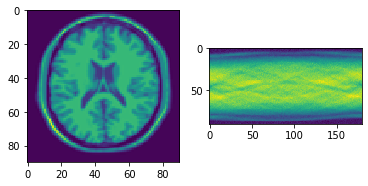

In [5]:
fg , ax = plt.subplots(1,2)
ax[0].imshow(x_view)
ax[1].imshow(y_view)

# Part 2

In [6]:
def f(x, y ,r, lambda_) : 
    return(1/2 * np.linalg.norm(H@x - y, ord=2) + labmda_ * r(x))

In [7]:
lambda_ ,delta = 0.13, 0.02

In [8]:
def grad_f(x) : 
    return(H.T @ H @ x - H.T @ y + lambda_ * G.T @ grad_psi(G @ x))

def grad_psi(u, delta=delta): 
    return(u / ( delta ** 2 * np.sqrt(1 + u ** 2 / ( delta ** 2 ))))

def h(x): 
    
    return(f(x_n) + np.dot(grad_f(x_n), x - x_n) + 1/2 * np.sqrt(np.dot(x - x_n, A @ (x - x_n))))

## Gradient Descent Algorithm 

In [9]:
M, N = 90 * 180, 90 * 90 
x_0 = np.zeros((N,1))

In [ ]:
learning_rate = 1e-4

x_n = x_0
converged = False
while not converged : 
    grad = grad_f(x_n)
    x_n -= learning_rate * grad
    print(np.sum(np.abs(grad)))
    if np.sum(np.abs(grad)) < 1e-6 * np.sum(np.abs(x_n)) : 
        converged = True


38846830.322968304
22146049.787367694
11634417.284493221
6746193.913401706
3461270.5800666045
2073395.9820008534
1021920.2993426851
700057.7466294917
471377.18699288886
396553.74658832257
328687.4271521403
294723.291479892
259447.58704373596
236903.64969418538
214410.94961572916
197734.43448476255
181965.1725525387
169078.68937306962
157290.3494079313
147153.44038408267
137925.57667513116
129740.62290386473
122256.07720990284
115478.43525978914
109268.69155378506
103573.57766089604
98315.06062518981
93451.50862223157
88953.04057926517
84781.00391304675
80904.43875818532
77287.57320293214
73902.90059516745
70740.25554247451
67775.33113553029
64990.73593006299
62370.48977375509
59901.35671058229
57567.93188264732
55363.55820567635
53279.66394628621
51304.96431151747
49430.04852642014
47653.078286087424
45965.77829910667
44360.39209901261
42831.90606208663
41375.61903932349
39987.69901516382
38666.04192242337
37403.41879206733
36197.06657443062
35044.65080488559
33941.47401410896
32884.43

In [ ]:
(x).shape

## MM quadratic algorithm

In [ ]:
from scipy.sparse.linalg  import LinearOperator

In [ ]:
def delta(x):
    return np.diag(grad_psi(x)/x)

def A_x(x): 
    return(H.T.dot((H.dot(x))) + lambda_ * G.T @ delta(G @ x) @ G)

In [ ]:

norm_a = LinearOperator((M,N),matvec = A_x)